# Solving DTLZ1 using MOEA/D with two scalarization functions

In this example we are going to solve the DTLZ1 benchmark problem using MOEA/D. To this aim, we need to import the following packages:


In [1]:
# Package for plotting the results
import plotly.graph_objects as go

# Package to create the Problem object
from desdeo_problem.testproblems.TestProblems import test_problem_builder

# Packages for using MOEA/D and the available scalarization functions
from desdeo_emo.EAs.MOEAD import MOEA_D
from desdeo_tools.scalarization.MOEADSF import (
    MOEADSFBase,
    Tchebycheff,
    PBI,
    WeightedSum,
)

Then, we will use the implementation of DTLZ1 available in desdeo-problem. We will use 7 decision variables and 3 objectives.

In [2]:
problem = test_problem_builder(name="DTLZ1", n_of_variables=7, n_of_objectives=3)

Now we need to pass some parameters to the MOEA/D: the problem to solve, and the number of generations. The rest of the parameters will take the default values, for more information about the available options, please refer to the API documentation. 

In [8]:
evolver = MOEA_D(problem, n_iterations=10, n_gen_per_iter=30, save_non_dominated=True)

Finally, we create a loop to run the algorithm until the stopping criteria is met.

In [9]:
evolver.start()
while evolver.continue_evolution():
    evolver.iterate()
    print(f"Running iteration {evolver._iteration_counter}")
print(f"Number of non-dominated solutions: {len(evolver.non_dominated['objectives'])}")

Running iteration 1
Running iteration 2
Running iteration 3
Running iteration 4
Running iteration 5
Running iteration 6
Running iteration 7
Running iteration 8
Running iteration 9
Running iteration 10


To visualize the results, we will plot the values of the objective function of the saved non-dominated solutions. 

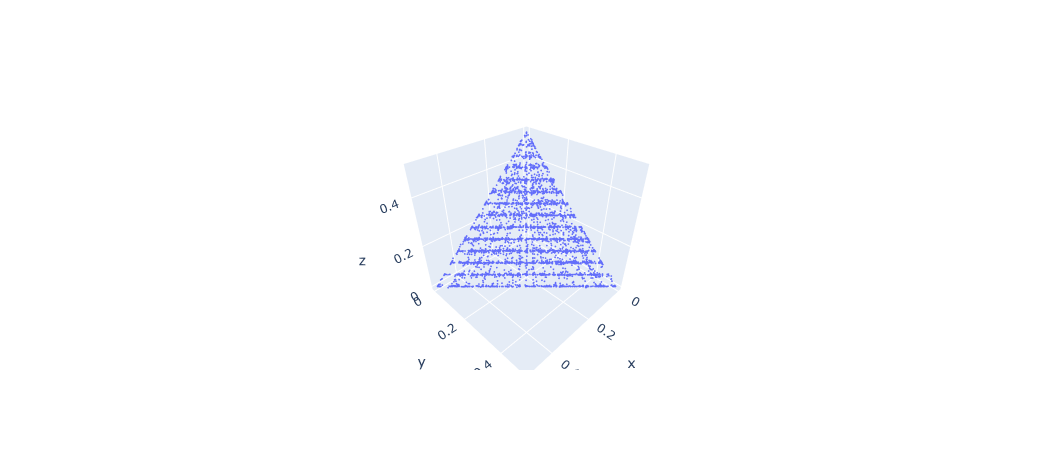

In [10]:
objectives = evolver.non_dominated["objectives"]
fig1 = go.Figure(data=go.Scatter3d(x=objectives[:,0],
                                   y=objectives[:,1],
                                   z=objectives[:,2],
                                   mode="markers",
                                   marker_size=1))
fig1

In [ ]:
# Just the final population
objectives = evolver.population.objectives
fig2 = go.Figure(data=go.Scatter3d(x=objectives[:,0],
                                   y=objectives[:,1],
                                   z=objectives[:,2],
                                   mode="markers",
                                   marker_size=1))
fig2

The previous example used the default scalarization function of the MOEA/D implementation, the PBI function. In the following example, we will use the Tchebycheff function. First we create a Tchebycheff object to use the implementation of this scalarizaion function available in desdeo-tools. Then, we use this object in the parameter "scalarization_function" of MOEA/D and run the algorithm until the stop criteria is met. 

In [13]:
tch =  Tchebycheff()
evolver = MOEA_D(problem,
                 scalarization_function = tch,
                 n_iterations=10,
                 n_gen_per_iter=30,
                 save_non_dominated=True
                )

evolver.start()
while evolver.continue_evolution():
    evolver.iterate()
    print(f"Running iteration {evolver._iteration_counter}")
print(f"Number of non-dominated solutions: {len(evolver.non_dominated['objectives'])}")

Running iteration 1
Running iteration 2
Running iteration 3
Running iteration 4
Running iteration 5
Running iteration 6
Running iteration 7
Running iteration 8
Running iteration 9
Running iteration 10
Number of non-dominated solutions: 6953


To visualize the new results, we create another plot with the objective values. 

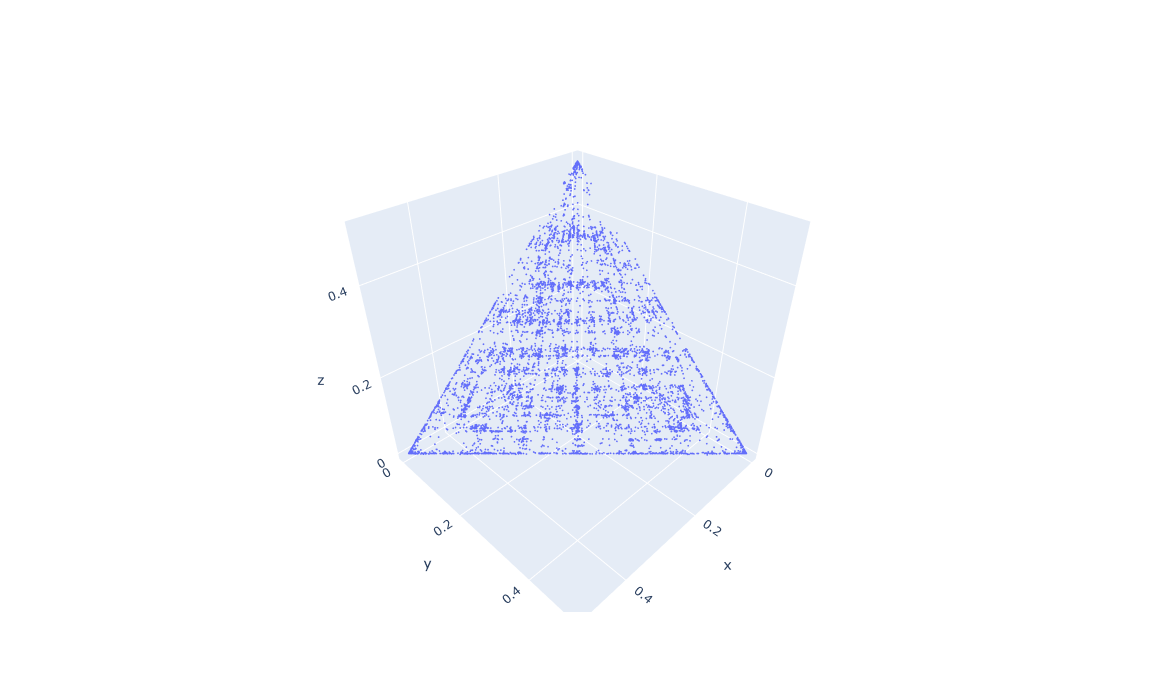

In [14]:
objectives = evolver.non_dominated["objectives"]
fig3 = go.Figure(data=go.Scatter3d(x=objectives[:,0],
                                   y=objectives[:,1],
                                   z=objectives[:,2],
                                   mode="markers",
                                   marker_size=1))
fig3

The solutions in this example have a diffeent distribution that the ones in the first figure.


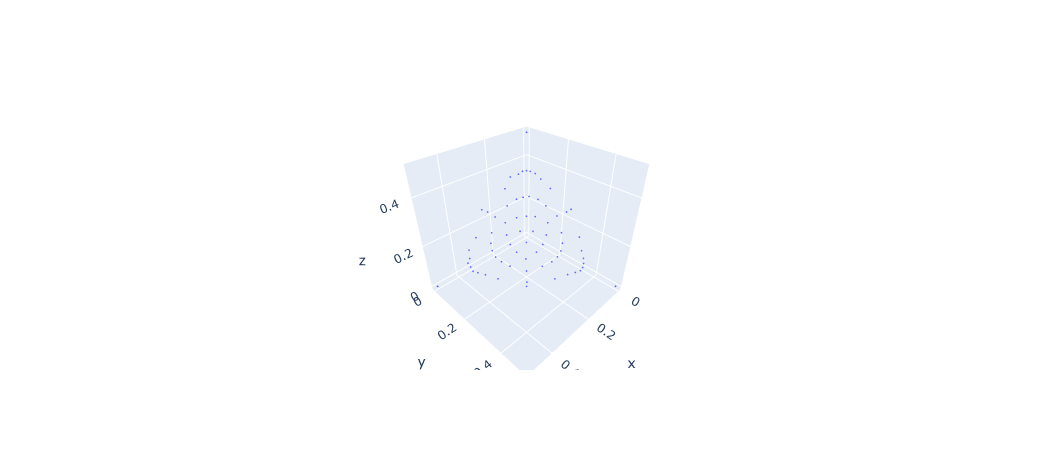

In [15]:
# Just the final population
objectives = evolver.population.objectives
fig4 = go.Figure(data=go.Scatter3d(x=objectives[:,0],
                                   y=objectives[:,1],
                                   z=objectives[:,2],
                                   mode="markers",
                                   marker_size=1))
fig4

## Interactive Optimization

In [24]:
from desdeo_emo.utilities import animate_init_, animate_next_
import pandas as pd
evolver = MOEA_D(problem,
               interact=True,
               n_iterations=5,
               n_gen_per_iter=40,
                 save_non_dominated=True
                )

figure = animate_init_(
    evolver.population.objectives[evolver.population.non_dominated_fitness()],
    filename="dtlz1.html")

Plot saved as:  dtlz1.html
View the plot by opening the file in browser.
To view the plot in Jupyter Notebook, use the IFrame command.


In [25]:
print(evolver.allowable_interaction_types)

{'Reference point': 'Specify a reference point worse than the utopian point. The reference vectors are focused around the vector joining provided reference point and the utopian point. New solutions are searched for in this focused region of interest.', 'Preferred solutions': 'Choose one or more solutions as the preferred solutions. The reference vectors are focused around the vector joining the utopian point and the preferred solutions. New solutions are searched for in this focused regions of interest.', 'Non-preferred solutions': 'Choose one or more solutions that are not preferred. The reference vectors near such solutions are removed. New solutions are hence not searched for in areas close to these solutions.', 'Preferred ranges': 'Provide preferred values for the upper and lower bounds of all objectives. New reference vectors are generated within these bounds. New solutions are searched for in this bounded region of interest.'}


In [26]:
evolver.set_interaction_type('Reference point')

In [27]:
pref, plot = evolver.start()

In [44]:
print(pref.content['message'])

Please provide a reference point worse than the ideal point:

f1    0.0
f2    0.0
f3    0.0
Name: ideal, dtype: object
The reference point will be used to focus the reference vectors towards the preferred region.
If a reference point is not provided, the reference vectors are spread uniformly in the objective space.


In [52]:
response = evolver.population.ideal_fitness_val + [0.04,0.04,0.4]
pref.response = pd.DataFrame([response], columns=pref.content['dimensions_data'].columns)

In [53]:
# Run with pref = None for a few (4-5) iterations.
#Refresh the plot in the new tab to see if solutions are close to the pareto front.
# Afterwards, activate interaction by commenting the line below.

#pref = None  # Set pref as None to provide no preference. This returns solutions that are uniformly spread in the objective space


pref, plot = evolver.iterate(pref)
figure = animate_next_(
    plot.content['data'].values,
    figure,
    filename="dtlz1.html",
    generation=evolver._iteration_counter,
)

message = (f"Current generation number:{evolver._current_gen_count}. "
           f"Is looping back recommended: {'Yes' if evolver.continue_evolution() else 'No'}")
print(message)

Current generation number:360. Is looping back recommended: No


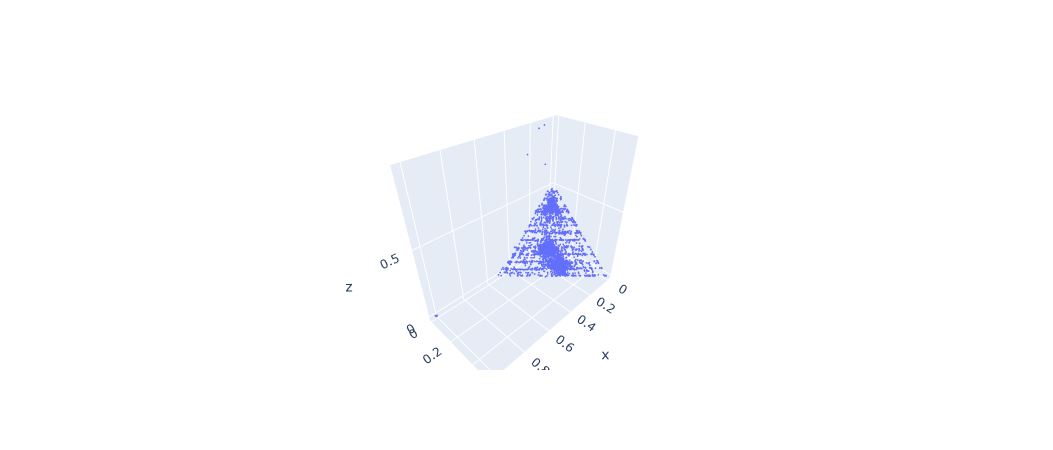

In [54]:
objectives = evolver.non_dominated["objectives"]
fig5 = go.Figure(data=go.Scatter3d(x=objectives[:,0],
                                   y=objectives[:,1],
                                   z=objectives[:,2],
                                   mode="markers",
                                   marker_size=1))
fig5